In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [6]:

df.shape

(962, 2)

In [7]:
#EXPLORING CATEGORIES

df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

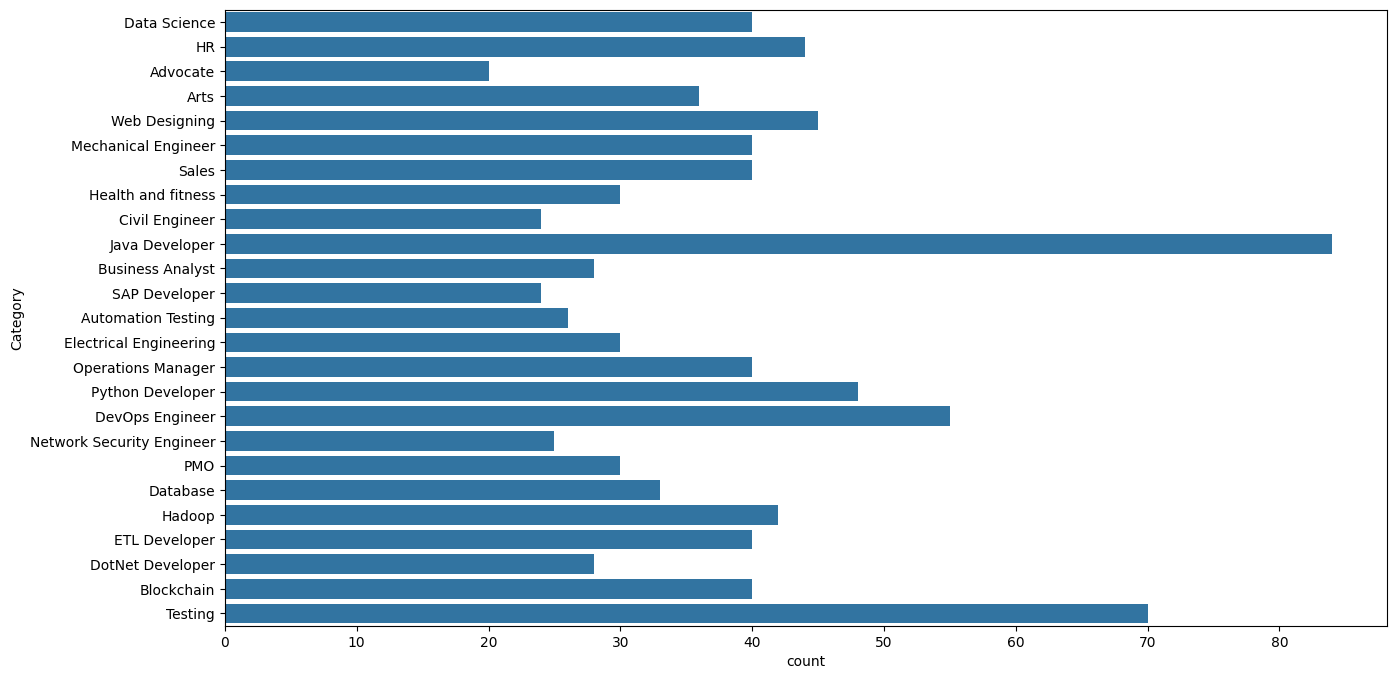

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, y='Category')
plt.xticks(rotation=0)
plt.show()

In [9]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

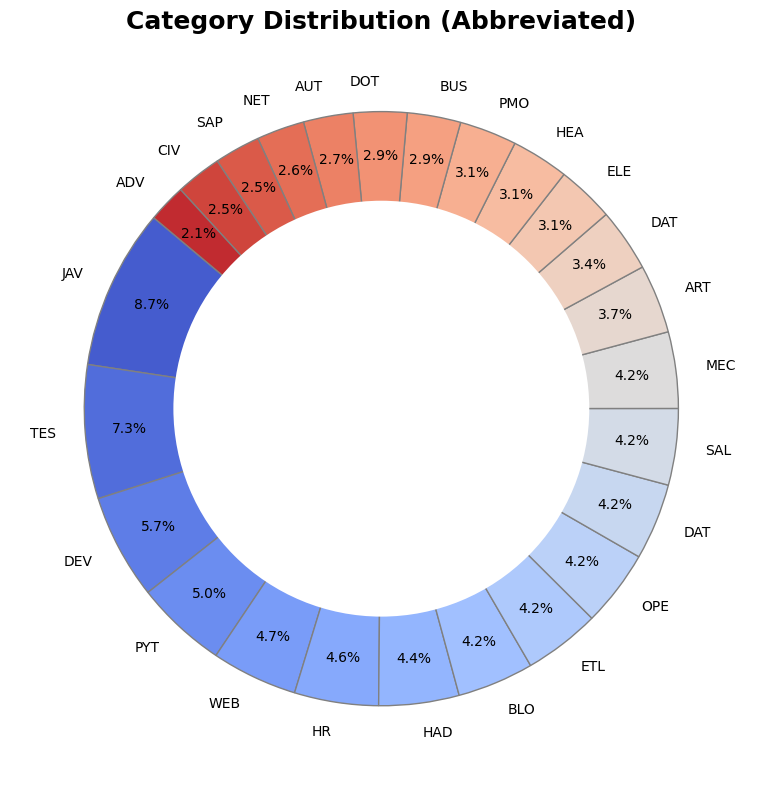

In [10]:
counts = df['Category'].value_counts()  # Counts of each category
labels = [label[:3].upper() for label in counts.index]  # Abbreviate each label to the first 3 letters

colors = sns.color_palette('coolwarm', len(labels))
plt.figure(figsize=(8,8))
plt.pie(counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        pctdistance=0.85,
        wedgeprops={'edgecolor': 'gray', 'linewidth': 1})
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Category Distribution (Abbreviated)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


In [11]:
#esploring resume

df['Category'][0]


'Data Science'

In [12]:
import re

def cleanResume(txt):

    cleanTxt = re.sub(r'http\S+', '', txt)
    cleanTxt = re.sub(r'\bRT\b|\bcc\b', '', cleanTxt)
    cleanTxt = re.sub(r'#\S+', '', cleanTxt)
    cleanTxt = re.sub(r'@\S+', '', cleanTxt)
    cleanTxt = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', cleanTxt)
    cleanTxt = re.sub(r'[^A-Za-z0-9\s]', '', cleanTxt)
    cleanTxt = re.sub(r'\s+', ' ', cleanTxt).strip()

    return cleanTxt


<>:9: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\]'
C:\Users\kikiv\AppData\Local\Temp\ipykernel_16620\1714004991.py:9: SyntaxWarning: invalid escape sequence '\]'
  cleanTxt = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', cleanTxt)


In [13]:
cleanResume("my website like is this http://heloword and access it")

'my website like is this and access it'

In [14]:
df['Resume'].apply(lambda x: cleanResume(x))

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 BE UITR...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to accept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...
961    Skill Set OS Windows XP788110 Database MYSQL s...
Name: Resume, Length: 962, dtype: object

In [15]:

df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [16]:
#words into categorical values

from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

print(df['Category'])

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32


In [17]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [18]:
#Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText=tfidf.transform(df['Resume'])

In [19]:
requiredText

<962x7384 sparse matrix of type '<class 'numpy.float64'>'
	with 164274 stored elements in Compressed Sparse Row format>

In [20]:
#splitting


X = requiredText
y = df['Category']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (769, 7384)
X_test shape: (193, 7384)


In [21]:

#Training the model and printing the classification report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import  OneVsRestClassifier

clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)

print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,ypred))

0.9844559585492227


In [23]:
import pickle
pickle.dump( requiredText,open('requiredText.pk1','wb'))
pickle.dump(le,open('tfidf.pk1','wb'))
pickle.dump(clf,open('clf.pk1','wb'))

In [24]:
import os

model_path = 'clf.pk1'
vectorizer_path = 'tfidf.pk1'

def load_pickle(file_path, file_name):
    if not os.path.exists(file_path):
        print(f"Error: {file_name} not found. Please check the path and try again.")
        return None  
    with open(file_path, 'rb') as file:
        return pickle.load(file)

clf = load_pickle(model_path, 'Model file (clf.pkl)')
tfidf = load_pickle(vectorizer_path, 'TF-IDF vectorizer (tfidf_vectorizer.pkl)')

if clf is None or tfidf is None:
    print("Loading failed. Please make sure both files are present and try again.")
else:
    print("Model and vectorizer loaded successfully.")


Model and vectorizer loaded successfully.


In [25]:
category_mapping = {
    0: 'Software Engineer',
    1: 'Data Scientist',
    2: 'Web Developer',
    3: 'Machine Learning Engineer',
    4: 'Data Analyst',
    5: 'DevOps Engineer',
    6: 'Project Manager',
    7: 'System Administrator'
}

In [26]:
def preprocess_resume(resume_text):
    return resume_text.lower()

In [27]:
myresume = """
John Doe
1234 Elm Street
Cityville, ST 12345
(123) 456-7890
johndoe@email.com

Objective:
Highly motivated software engineer with a strong background in developing scalable web applications. Seeking a challenging position to leverage my expertise in full-stack development and problem-solving skills to contribute to innovative projects.

Education:
Bachelor of Science in Computer Science
University of Technology, Graduated: 2022

Experience:
Software Engineer Intern at Tech Innovations
- Developed RESTful APIs using Python and Flask, improving data retrieval times by 30%.
- Collaborated with a team of 5 to design and implement user-friendly web interfaces.

Projects:
Personal Finance Tracker
- Created a full-stack web application using React for the frontend and Node.js for the backend, allowing users to track their expenses effectively.

Skills:
- Programming Languages: Python, JavaScript, Java
- Frameworks: Flask, React, Django
- Tools: Git, Docker, PostgreSQL

Certifications:
- Certified Python Developer
- AWS Certified Solutions Architect - Associate

References:
Available upon request.
"""

In [28]:
print("Transforming resume with TF-IDF vectorizer...")
try:
    input_features = tfidf.transform([cleaned_resume])
    print("Transformation successful.\n")
except Exception as e:
    print(f"Error during TF-IDF transformation: {e}")

Transforming resume with TF-IDF vectorizer...
Error during TF-IDF transformation: name 'cleaned_resume' is not defined


In [30]:
cleaned_resume = preprocess_resume(myresume)

# Transform and predict
try:
    input_features = tfidf.transform([cleaned_resume])
    prediction_id = clf.predict(input_features)[0]
    predicted_category = category_mapping.get(prediction_id, "Unknown Category")
    print("Predicted Category:", predicted_category)
except Exception as e:
    print(f"The mistakes that are found in the given resume during prediction :\n {e}")


The mistakes that are found in the given resume during prediction :
 y contains previously unseen labels: '\njohn doe\n1234 elm street\ncityville, st 12345\n(123) 456-7890\njohndoe@email.com\n\nobjective:\nhighly motivated software engineer with a strong background in developing scalable web applications. seeking a challenging position to leverage my expertise in full-stack development and problem-solving skills to contribute to innovative projects.\n\neducation:\nbachelor of science in computer science\nuniversity of technology, graduated: 2022\n\nexperience:\nsoftware engineer intern at tech innovations\n- developed restful apis using python and flask, improving data retrieval times by 30%.\n- collaborated with a team of 5 to design and implement user-friendly web interfaces.\n\nprojects:\npersonal finance tracker\n- created a full-stack web application using react for the frontend and node.js for the backend, allowing users to track their expenses effectively.\n\nskills:\n- programm